#  Model `WNMF`

In [1]:
# use project files rather than the installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

In [2]:
# # generating synthetic data

# from PyBMF.generators import BlockDiagonalMatrixGenerator

# data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.3, 0.2])
# data.generate(seed=1000)
# data.add_noise(noise=[0.4, 0.1], seed=2000)

# data.show_matrix(scaling=0.5)

/Users/felixnie/miniconda3/envs/pybmf/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/felixnie/MEGA/PyBMF/examples/../PyBMF/datasets/BaseData.py:101: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  data = pickle.load(handle)


[I] Found settings.ini at /Users/felixnie/MEGA/PyBMF/examples/settings.ini
[I] Sampling axis 0 to size 300
[I]   sampling seed: 1000
[I]   sampling from: (943, 1682)
[I]   sampling to  : (300, 1682)
[I] Sampling axis 1 to size 500
[I]   sampling seed: 1000
[I]   sampling from: (300, 1682)
[I]   sampling to  : (300, 500)


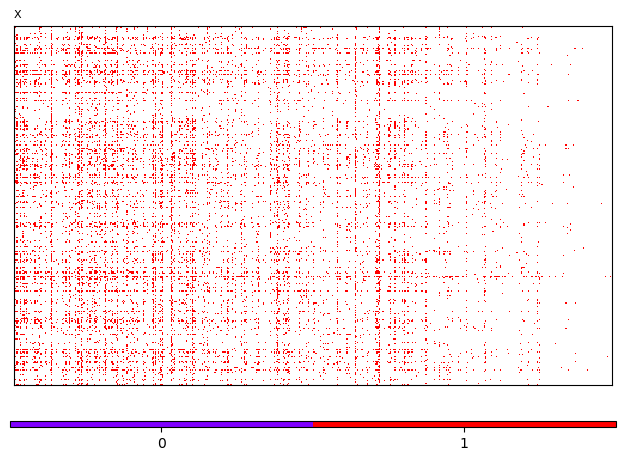

<Figure size 640x480 with 0 Axes>

In [3]:
# loading real-world data

from PyBMF.datasets import MovieLensData

data = MovieLensData(size="100k")
data.load()

idx = data.sample(factor_id=0, n_samples=300, seed=1000)
idx = data.sample(factor_id=1, n_samples=500, seed=1000)

data.show_matrix(scaling=0.5)

In [4]:
# splitting the data into train, validation and test

from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')
split.negative_sample(
    size=split.pos_size, 
    seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1722575944
[I]   train_size   : 10754
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1722575944
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 139246
[I]   n_negatives  : 43016
[I]   train_size   : 43016
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 2023


# Without masking

[I] k            : 15
[I] U            : None
[I] V            : None
[I] W            : full
[I] beta_loss    : frobenius
[I] init_method  : normal
[I] solver       : mu
[I] tol          : 0.0
[I] min_diff     : 0.0
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] show_logs    : False
[I] save_model   : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-02 13-19-04-942662 WNMF
[I] U, V existed. Skipping initialization.


[I] error: 2.486097e+03: : 1001it [00:27, 36.49it/s]                        


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  27s


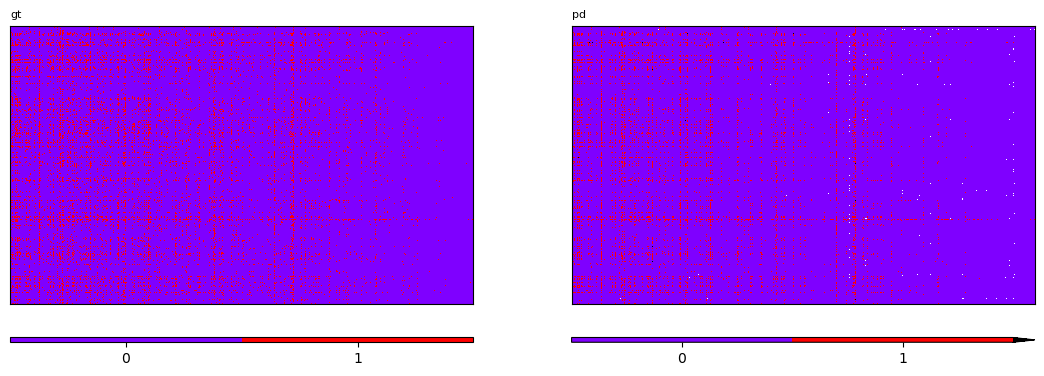

<Figure size 640x480 with 0 Axes>

In [5]:
from PyBMF.models import WNMF

k = 15
beta_loss = 'frobenius'
init_method='normal'
solver = 'mu'
W = 'full'

model_nmf = WNMF(k=k, W=W, beta_loss=beta_loss, init_method=init_method, solver=solver, max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, show_logs=False, save_model=False)

# With masking

[I] k            : 15
[I] U            : None
[I] V            : None
[I] W            : mask
[I] beta_loss    : frobenius
[I] init_method  : normal
[I] solver       : mu
[I] tol          : 0.0
[I] min_diff     : 0.0
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] show_logs    : False
[I] save_model   : False
[I] task         : reconstruction
[I]   show_logs  : False
[I]   save_model : False
[I] Missing validation data.
[W] Missing testing data.
[I] name         : 2024-08-02 13-19-33-260713 WNMF
[I] U, V existed. Skipping initialization.


[I] error: 2.230026e+03: : 1001it [00:35, 27.88it/s]                        


[W] Stopped in advance: Reach maximum iteration
[I] time elapsed :  35s


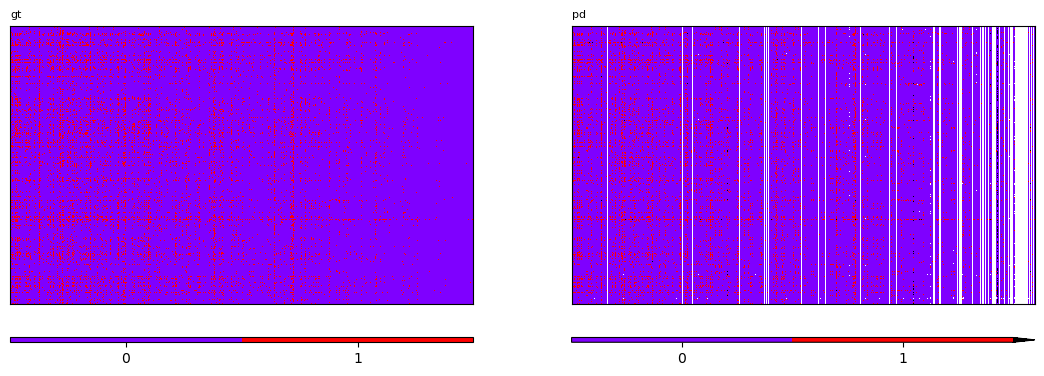

<Figure size 640x480 with 0 Axes>

In [6]:
from PyBMF.models import WNMF

k = 15
beta_loss = 'frobenius'
init_method='normal'
solver = 'mu'
W = 'mask'

model_nmf = WNMF(k=k, W=W, beta_loss=beta_loss, init_method=init_method, solver=solver, max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train, task='reconstruction', verbose=False, display=False, show_logs=False, save_model=False)